In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# 1. Importing our data to jupyter notebook

In [176]:
data = pd.read_csv('game.csv') 
print("Dataset Shape: ", data.shape)

data.head(10)

Dataset Shape:  (171907, 161)


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,18710506,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,18710508,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,18710509,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y
5,18710511,0,Thu,CH1,na,2,CL1,na,4,18,...,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,NaN,Y
6,18710513,0,Sat,WS3,na,2,CL1,na,5,12,...,Ezra Sutton,5.0,white104,Elmer White,9.0,bassj101,John Bass,6.0,NaN,Y
7,18710513,0,Sat,CH1,na,3,FW1,na,2,14,...,Ed Mincher,7.0,donnp101,Pete Donnelly,8.0,kellb105,Bill Kelly,9.0,NaN,Y
8,18710515,0,Mon,WS3,na,3,FW1,na,3,6,...,Ed Mincher,7.0,donnp101,Pete Donnelly,9.0,kellb105,Bill Kelly,8.0,NaN,Y
9,18710516,0,Tue,TRO,na,2,BS1,na,3,29,...,Fred Cone,7.0,spala101,Al Spalding,1.0,jacks101,Sam Jackson,8.0,HTBF,Y


In [177]:
data.drop(data.iloc[:,29:200], inplace = True, axis = 1)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               171907 non-null  int64  
 1   number_of_game     171907 non-null  int64  
 2   day_of_week        171907 non-null  object 
 3   v_name             171907 non-null  object 
 4   v_league           171907 non-null  object 
 5   v_game_number      171907 non-null  int64  
 6   h_name             171907 non-null  object 
 7   h_league           171907 non-null  object 
 8   h_game_number      171907 non-null  int64  
 9   v_score            171907 non-null  int64  
 10  h_score            171907 non-null  int64  
 11  length_outs        140841 non-null  float64
 12  day_night          140150 non-null  object 
 13  completion         116 non-null     object 
 14  forefeit           145 non-null     object 
 15  protest            180 non-null     object 
 16  pa

# 2. Eliminating columns that are not useful 

In [179]:
res = data.drop(['date','number_of_game','day_of_week','v_name','v_league','v_game_number','h_name',
          'h_league','h_game_number','h_name','h_league','h_game_number',
          'length_outs','day_night','completion','forefeit','protest','park_id','attendance',
          'length_minutes','v_line_score','h_line_score'],axis=1)

In [180]:
res

,v_score,h_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies
0,0,2,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
1,20,18,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0
2,12,4,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0
3,12,14,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0
4,9,5,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
171902,6,4,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0
171903,2,5,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0
171904,1,7,30.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
171905,4,10,35.0,9.0,0.0,0.0,1.0,4.0,0.0,0.0


In [181]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   v_score            171907 non-null  int64  
 1   h_score            171907 non-null  int64  
 2   v_at_bats          140838 non-null  float64
 3   v_hits             140838 non-null  float64
 4   v_doubles          140838 non-null  float64
 5   v_triples          140838 non-null  float64
 6   v_homeruns         140838 non-null  float64
 7   v_rbi              140838 non-null  float64
 8   v_sacrifice_hits   140838 non-null  float64
 9   v_sacrifice_flies  140838 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 13.1 MB


In [182]:
res.head(10)

,v_score,h_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies
0,0,2,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
1,20,18,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0
2,12,4,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0
3,12,14,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0
4,9,5,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0
5,18,10,41.0,15.0,1.0,3.0,3.0,10.0,0.0,0.0
6,12,8,42.0,9.0,2.0,0.0,0.0,5.0,0.0,0.0
7,14,5,45.0,17.0,5.0,2.0,0.0,10.0,0.0,0.0
8,6,12,42.0,8.0,0.0,0.0,0.0,2.0,0.0,0.0
9,29,14,64.0,26.0,3.0,1.0,0.0,26.0,0.0,0.0


In [183]:
res.isnull().sum()

v_score                  0
h_score                  0
v_at_bats            31069
v_hits               31069
v_doubles            31069
v_triples            31069
v_homeruns           31069
v_rbi                31069
v_sacrifice_hits     31069
v_sacrifice_flies    31069
dtype: int64

# 3. We created another column called res to represent the winning team (note: its not yet converted to binary)

In [184]:
res['Winner'] = res['h_score'] - res['v_score']

In [185]:
res

,v_score,h_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,Winner
0,0,2,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2
1,20,18,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,-2
2,12,4,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0,-8
3,12,14,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0,2
4,9,5,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0,-4
...,...,...,...,...,...,...,...,...,...,...,...
171902,6,4,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0,-2
171903,2,5,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0,3
171904,1,7,30.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,6
171905,4,10,35.0,9.0,0.0,0.0,1.0,4.0,0.0,0.0,6


# 4. Our target is the Winner while our features are v_at_bats,	v_hits,	v_doubles,	v_triples,	v_homeruns,	v_rbi,	v_sacrifice_hits, and	v_sacrifice_flies. Now we graph each feature versus the target to find pattern in the data.	

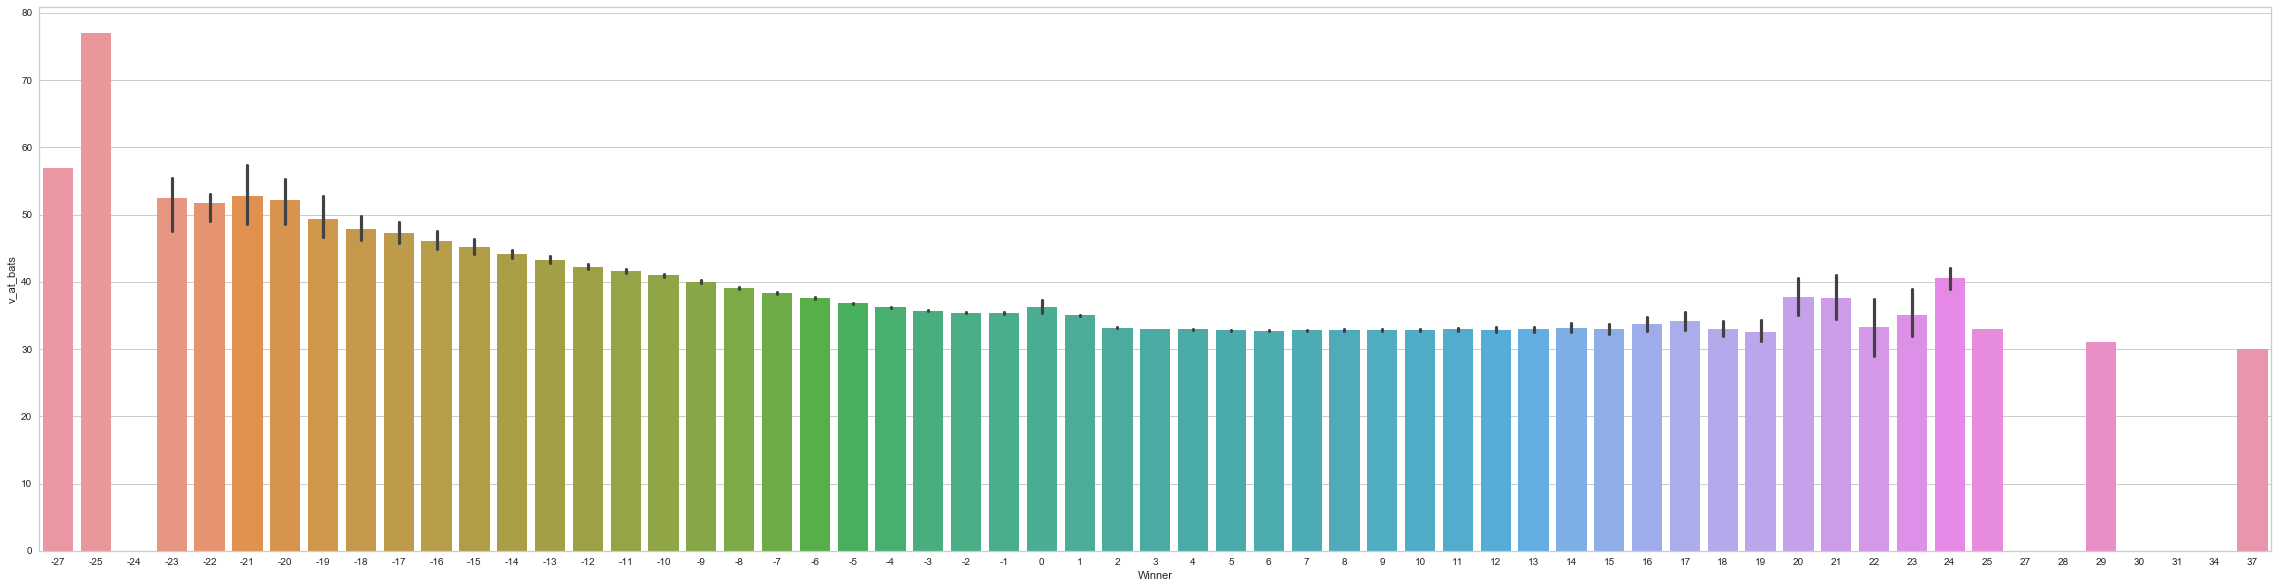

In [186]:
# v_at_bats vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_at_bats', data = res)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


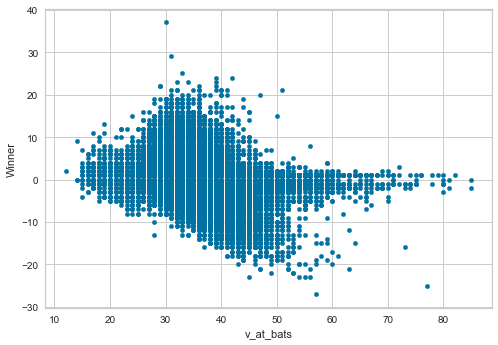

In [187]:
res.plot.scatter(x = 'v_at_bats', y = 'Winner')

# The barplot shows a downward trend while the scatter plot shows no trend.

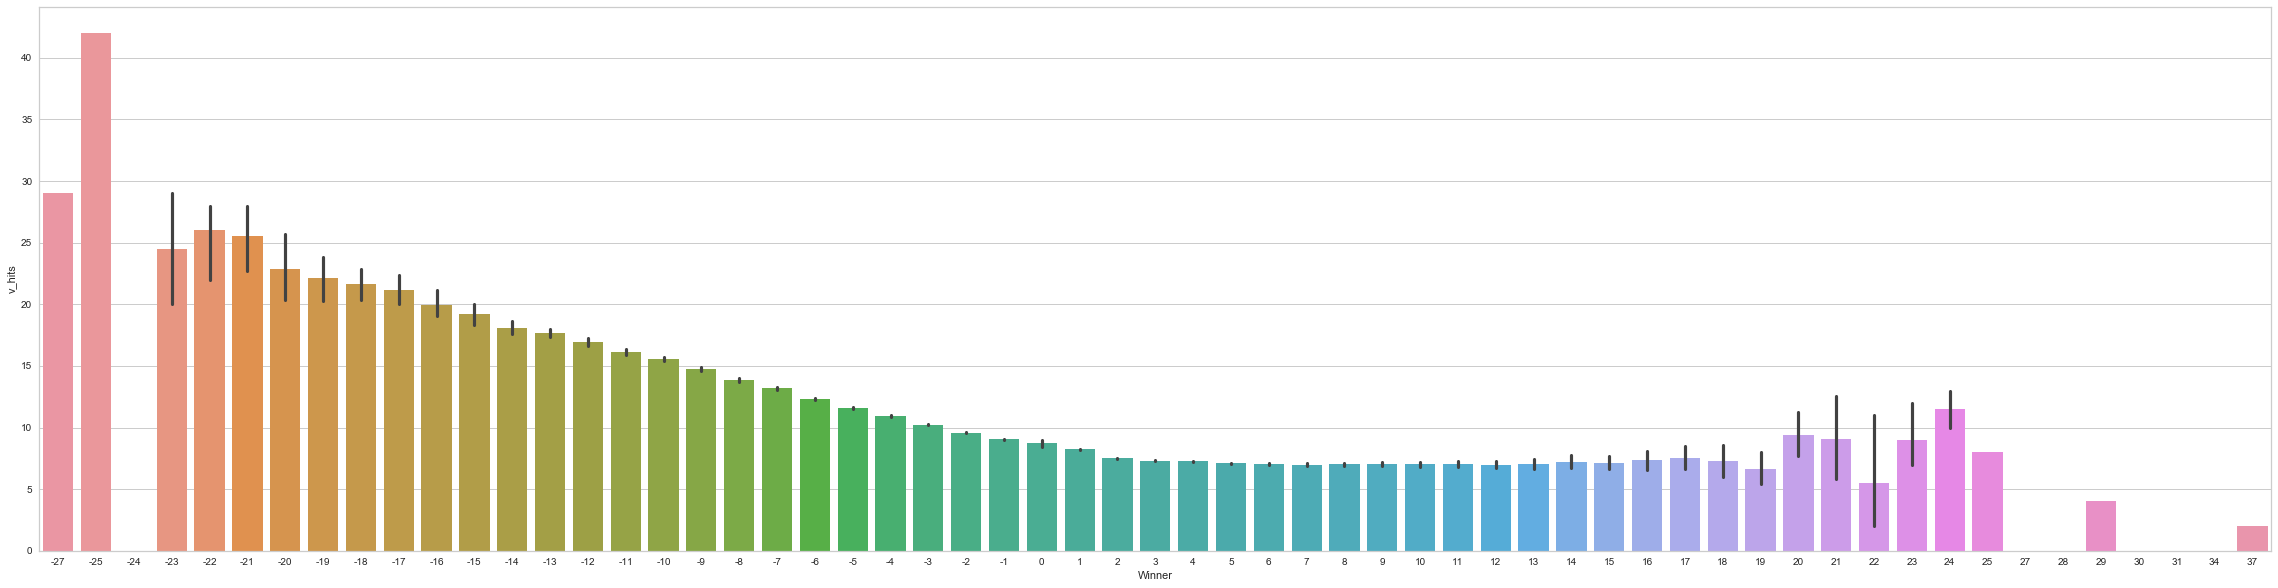

In [188]:
# v_hits vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_hits', data = res)

# The barplot shows a downward trend.

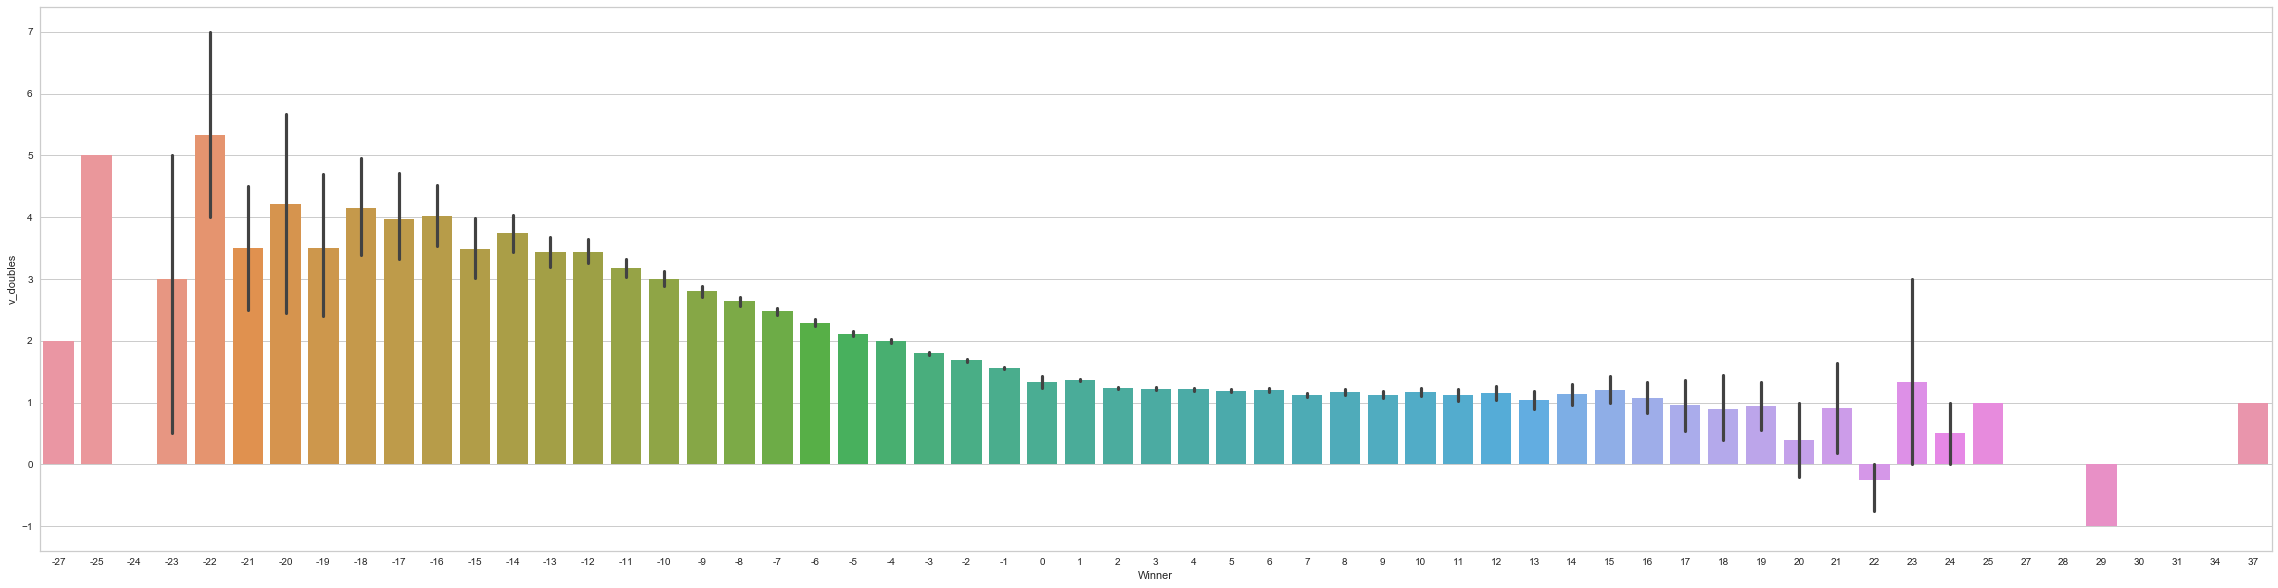

In [189]:
# v_doubles vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_doubles', data = res)

# The barplot shows a downward trend.

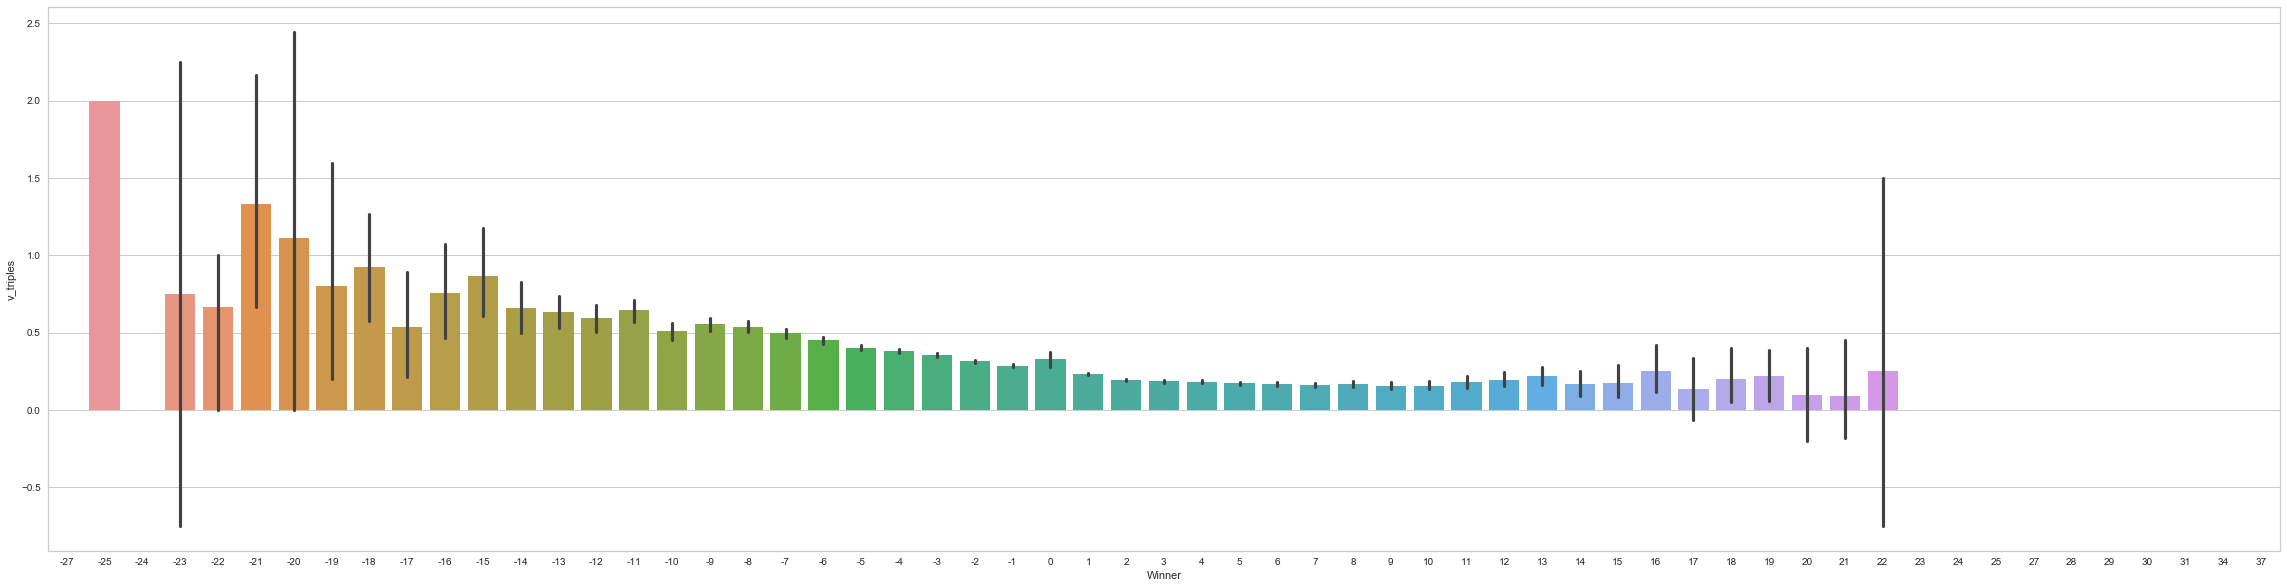

In [190]:
# v_triples vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_triples', data = res)

# The barplot shows a downward trend.

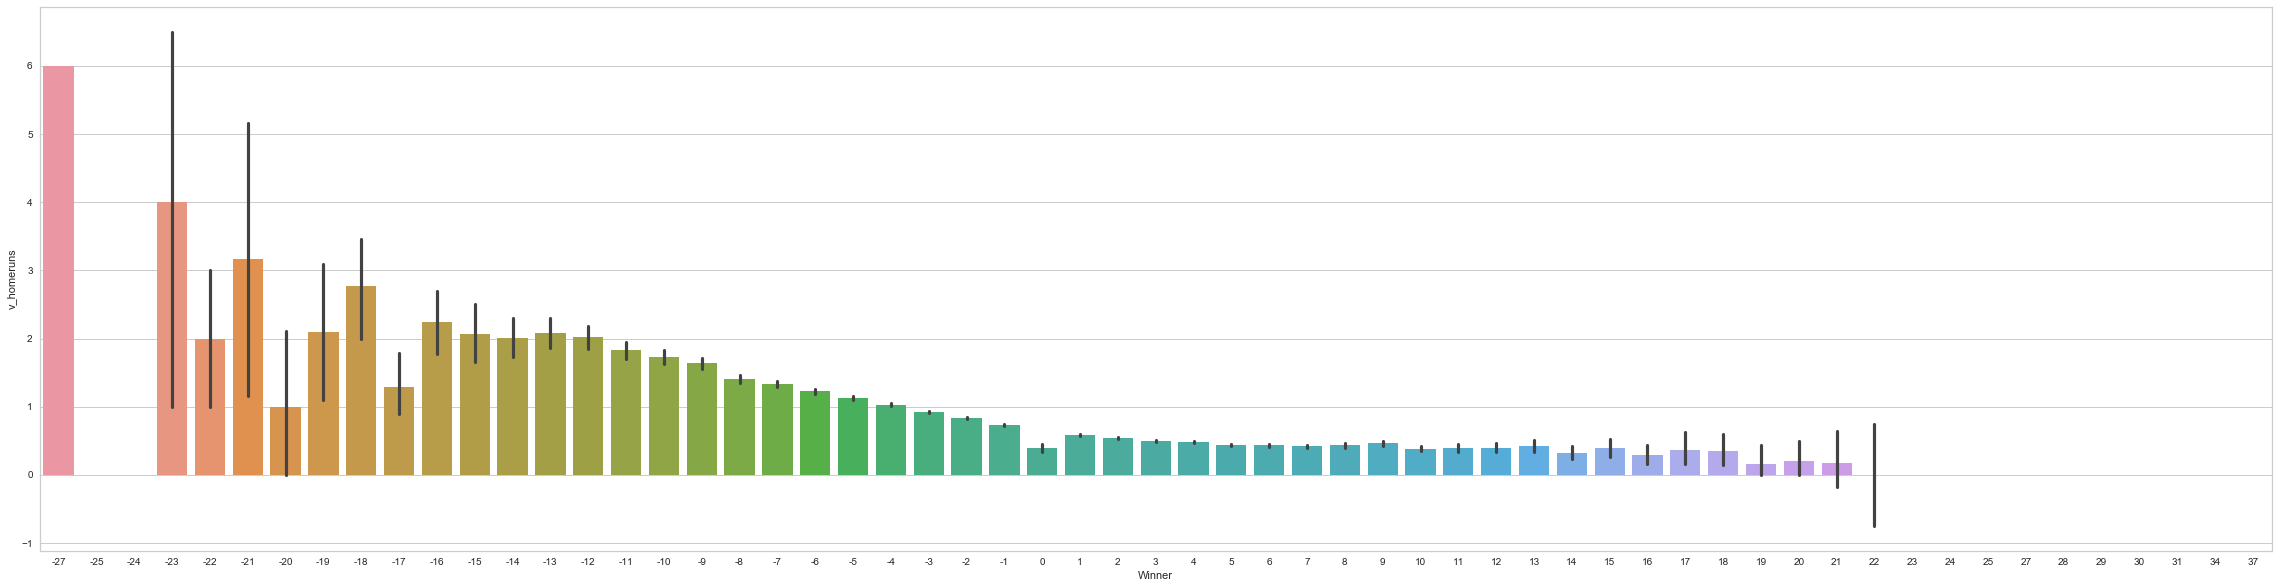

In [191]:
# v_homeruns vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_homeruns', data = res)

# The barplot shows a downward trend.

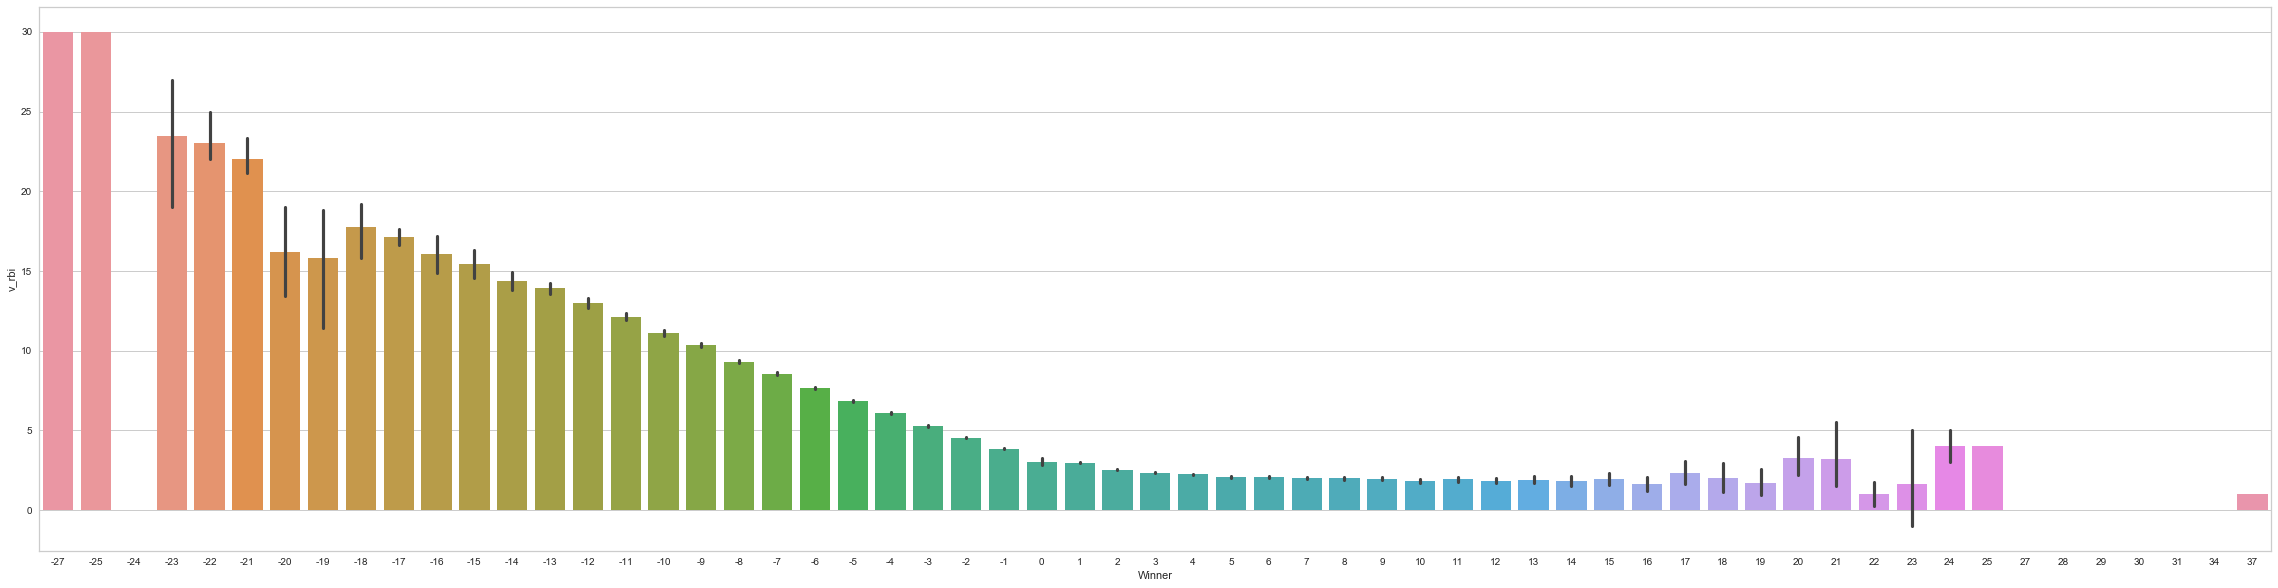

In [192]:
# v_rbi vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_rbi', data = res)

# The barplot shows a downward trend.

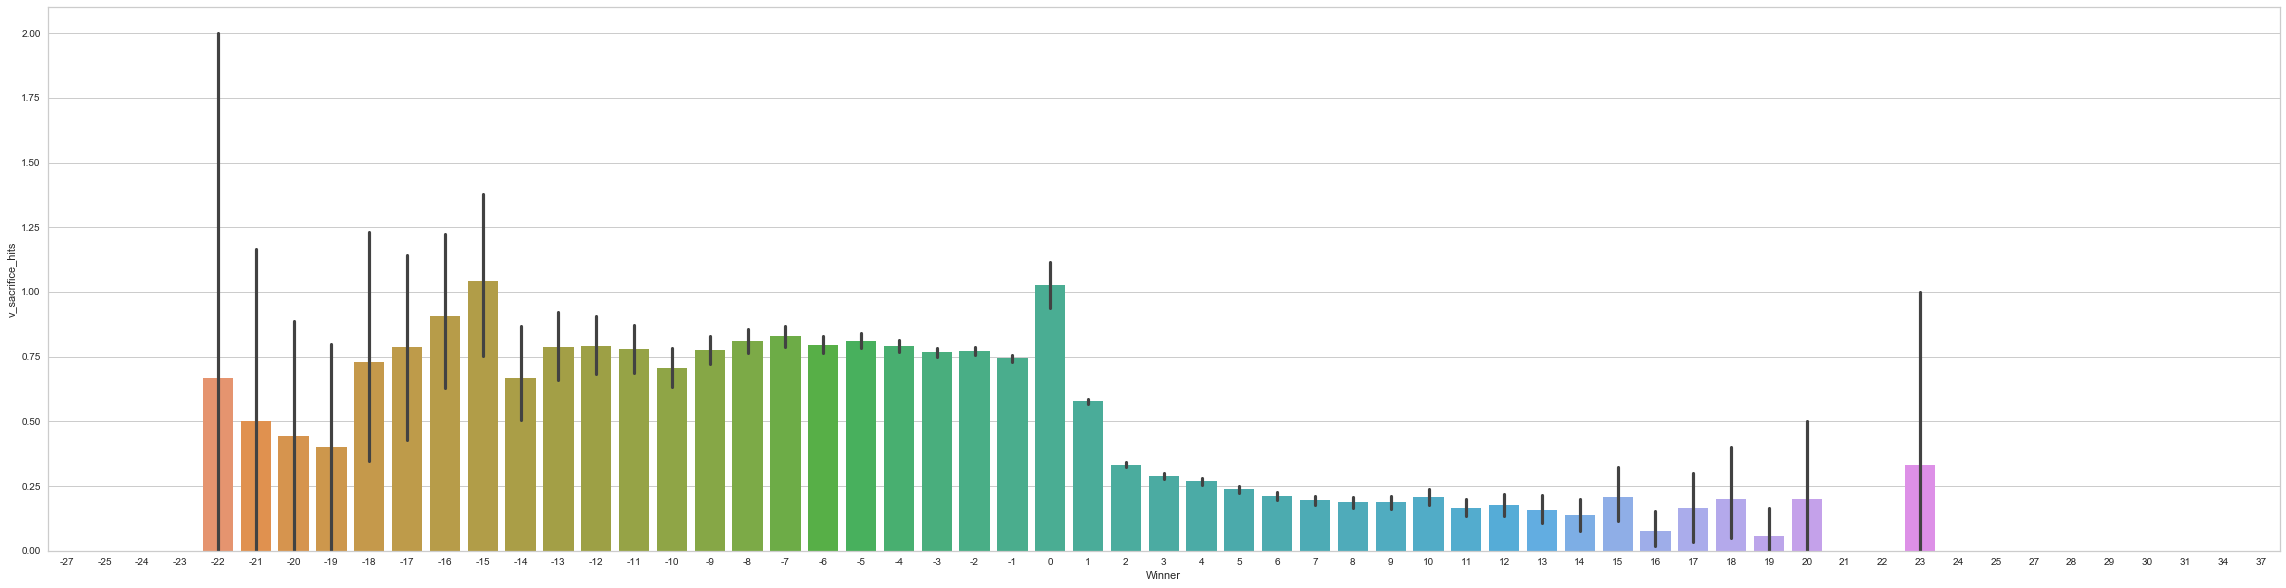

In [193]:
# v_sacrifice_hits vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_sacrifice_hits', data = res)

# The barplot shows no trend.

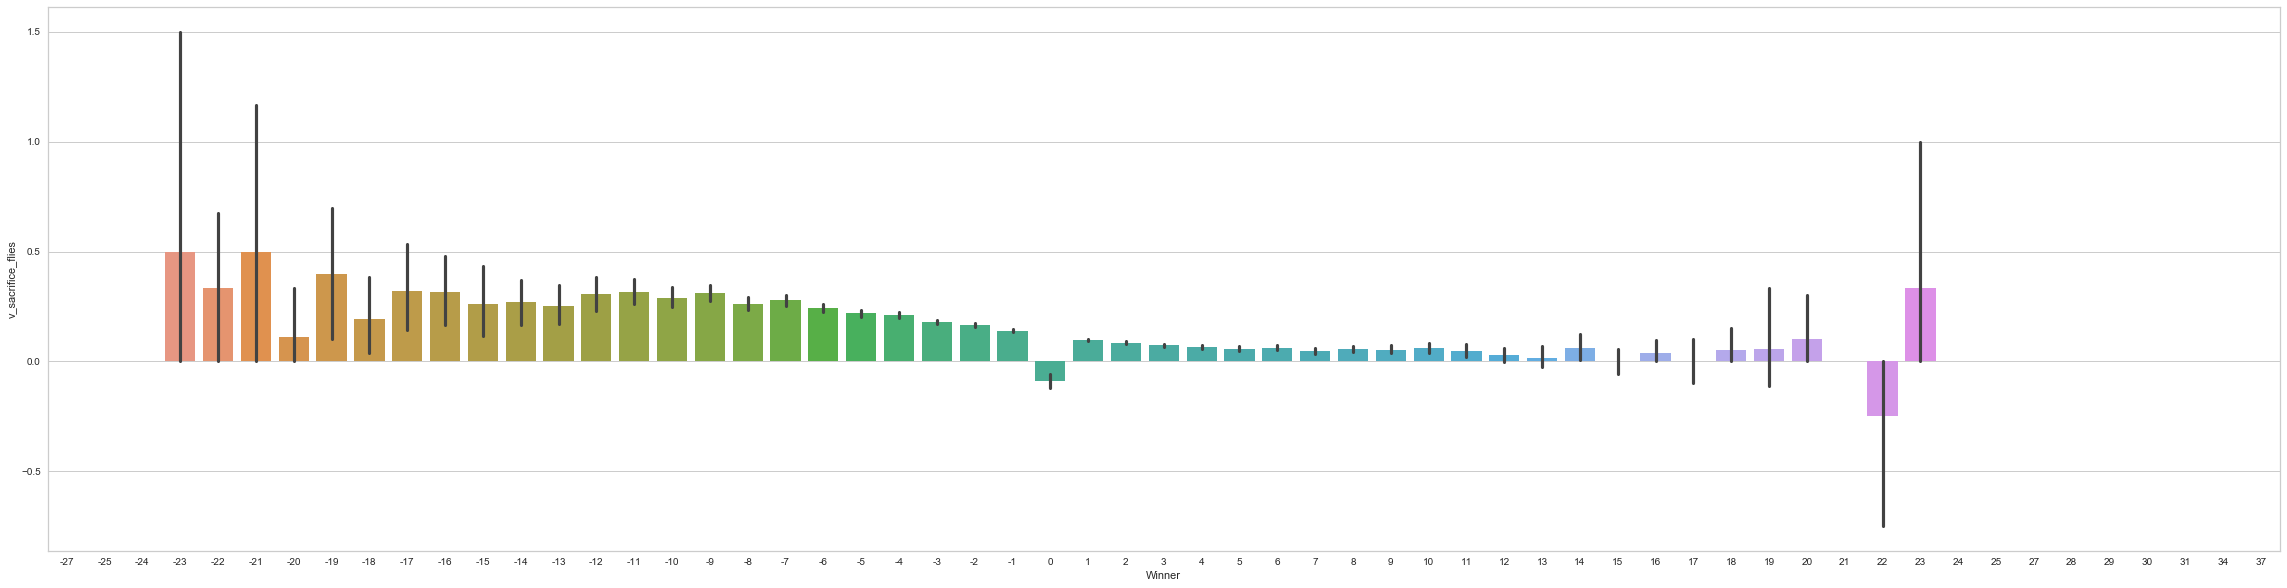

In [194]:
# v_sacrifice_flies vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_sacrifice_flies', data = res)

# The barplot shows a downward trend.

# 5. Now we are going to convert the target to binary numbers: 1 represents a win and 0 represents a loss.

In [195]:
res['Winner'] = res['Winner'].apply(lambda x: 1 if x > 0 else 0)
res.head(20)

,v_score,h_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,Winner
0,0,2,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,20,18,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0
2,12,4,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0,0
3,12,14,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0,1
4,9,5,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0,0
5,18,10,41.0,15.0,1.0,3.0,3.0,10.0,0.0,0.0,0
6,12,8,42.0,9.0,2.0,0.0,0.0,5.0,0.0,0.0,0
7,14,5,45.0,17.0,5.0,2.0,0.0,10.0,0.0,0.0,0
8,6,12,42.0,8.0,0.0,0.0,0.0,2.0,0.0,0.0,1
9,29,14,64.0,26.0,3.0,1.0,0.0,26.0,0.0,0.0,0


1    93587
0    78320
Name: Winner, dtype: int64


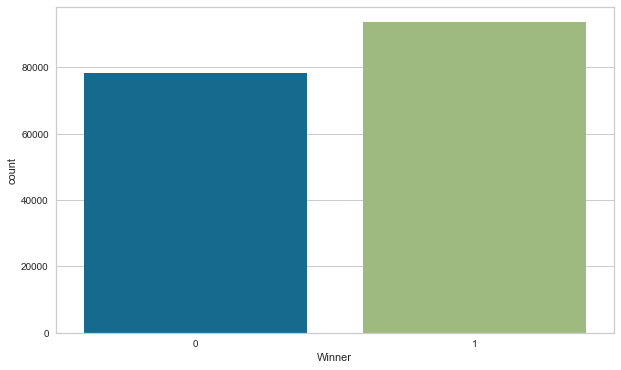

In [196]:
print(res['Winner'].value_counts())

fig = plt.figure(figsize=(10,6))
sns.countplot(res['Winner'])

# Removing the first two columns, we do not really need them. Here we obtained our final data with the features as our independent variables and the target (Winner) as the dependent variable.

In [197]:
Data_Final = res.drop(['v_score','h_score'],axis=1)

In [198]:
Data_Final.head()

,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,Winner
0,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0
2,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0,0
3,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0,1
4,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0,0


In [199]:
Data_Final.mean()

v_at_bats            34.914398
v_hits                8.999318
v_doubles             1.562391
v_triples             0.276012
v_homeruns            0.728653
v_rbi                 3.993042
v_sacrifice_hits      0.558741
v_sacrifice_flies     0.128609
Winner                0.544405
dtype: float64

In [200]:
df = Data_Final.replace([' ','NULL','na','(none)'],np.nan)

In [201]:
print(df.isin(['NaN']))

        v_at_bats  v_hits  v_doubles  v_triples  v_homeruns  v_rbi  \
0           False   False      False      False       False  False   
1           False   False      False      False       False  False   
2           False   False      False      False       False  False   
3           False   False      False      False       False  False   
4           False   False      False      False       False  False   
...           ...     ...        ...        ...         ...    ...   
171902      False   False      False      False       False  False   
171903      False   False      False      False       False  False   
171904      False   False      False      False       False  False   
171905      False   False      False      False       False  False   
171906      False   False      False      False       False  False   

        v_sacrifice_hits  v_sacrifice_flies  Winner  
0                  False              False   False  
1                  False              False   False

In [202]:
print(df.isin(['NaN']).mean())

v_at_bats            0.0
v_hits               0.0
v_doubles            0.0
v_triples            0.0
v_homeruns           0.0
v_rbi                0.0
v_sacrifice_hits     0.0
v_sacrifice_flies    0.0
Winner               0.0
dtype: float64


In [203]:
# drop any NaNs
df_2 = df.dropna()

In [204]:
df_2.shape

(140838, 9)

In [205]:
df_2.dtypes

v_at_bats            float64
v_hits               float64
v_doubles            float64
v_triples            float64
v_homeruns           float64
v_rbi                float64
v_sacrifice_hits     float64
v_sacrifice_flies    float64
Winner                 int64
dtype: object

In [206]:
#ML model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [207]:
#VS
from yellowbrick.classifier import classification_report, confusion_matrix, discrimination_threshold

In [208]:
features = df_2[[ 'v_at_bats', 'v_hits', 'v_doubles','v_triples','v_homeruns',
                 'v_rbi','v_sacrifice_hits','v_sacrifice_flies']]

target = df_2[['Winner']].values.ravel()

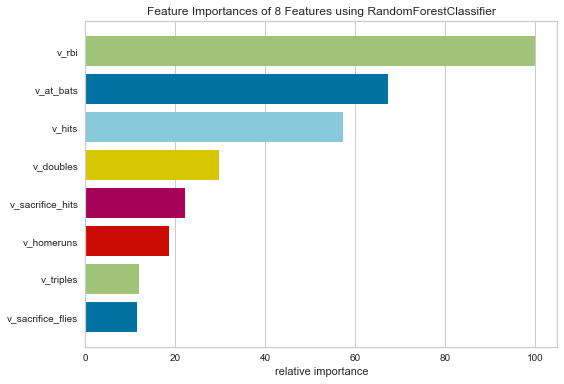

In [209]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(features, target)
viz.show()

In [157]:
#figer out the best seven features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
    
fvalue_Best = SelectKBest(f_classif, k=8)
X_kbest = fvalue_Best.fit_transform(features, target)

In [158]:
print('Original number of features:', df_2.shape)
print('Reduced number of features:', X_kbest.shape)

Original number of features: (140838, 9)
Reduced number of features: (140838, 8)


In [159]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_kbest, target, test_size=0.2
)


In [160]:
X_train.shape

(112670, 8)

In [161]:
y_train.shape

(112670,)

In [162]:
# Taking the best seven features and applying them to different ML models
cross_validate(GaussianNB(), X_train, y_train, cv=TimeSeriesSplit(), scoring='f1_macro')

{'fit_time': array([0.01046491, 0.01025701, 0.01492572, 0.02648497, 0.02452183]),
 'score_time': array([0.01112604, 0.00867581, 0.00789022, 0.00754094, 0.00807333]),
 'test_score': array([0.71724231, 0.72376163, 0.71737593, 0.71983114, 0.71934181])}

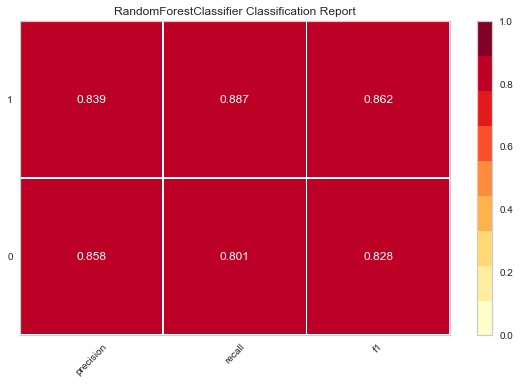

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a32898790>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x1a4b61aad0>,
                     encoder=None,
                     estimator=RandomForestClassifier(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      class_weight=None,
                                                      criterion='gini',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                     

In [164]:
classification_report(model, X_train, y_train, is_fitted=False)

In [165]:
cross_validate(SVC(kernel='rbf', degree=3), X_train, y_train, cv=TimeSeriesSplit(), scoring='f1_macro')

{'fit_time': array([  6.39668822,  25.19994688,  57.1699307 , 140.18678498,
        172.18001509]),
 'score_time': array([ 3.25687289,  6.40420699,  9.95428705, 13.96169496, 16.45067215]),
 'test_score': array([0.75216456, 0.75269186, 0.74914714, 0.7498065 , 0.75208033])}

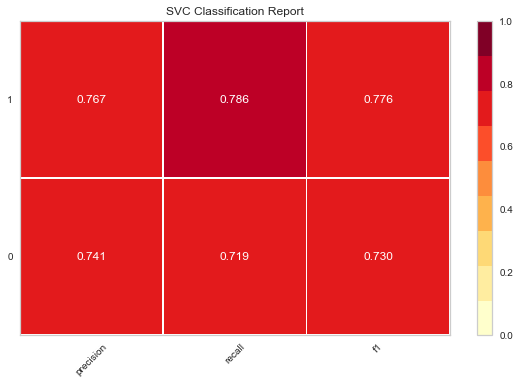

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a32805b10>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x1a4aff3b50>,
                     encoder=None,
                     estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                   class_weight=None, coef0=0.0,
                                   decision_function_shape='ovr', degree=3,
                                   gamma='scale', kernel='rbf', max_iter=-1,
                                   probability=False, random_state=None,
                                   shrinking=True, tol=0.001, verbose=False),
                     force_model=False, is_fitted=False, support=None)

In [166]:
classification_report(SVC(kernel='rbf', degree=3), X_train, y_train,is_fitted=False)

In [167]:
cross_validate(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=TimeSeriesSplit(),
               scoring='f1_macro')

{'fit_time': array([0.02954817, 0.06226707, 0.13581991, 0.24181366, 0.35799909]),
 'score_time': array([0.81356001, 0.91204405, 1.16440296, 1.34847832, 1.56446815]),
 'test_score': array([0.72382974, 0.72546765, 0.72067685, 0.71991343, 0.72157975])}

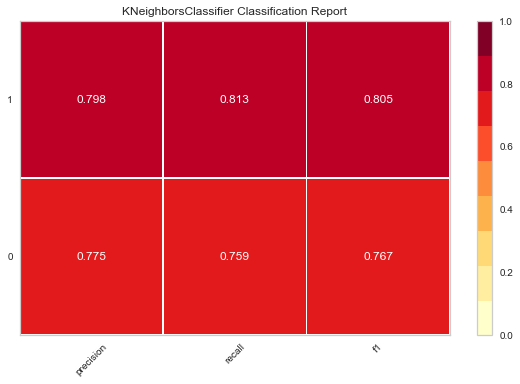

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a34caf910>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x1a34cc8250>,
                     encoder=None,
                     estimator=KNeighborsClassifier(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=5,
                                                    p=2, weights='uniform'),
                     force_model=False, is_fitted='auto', support=None)

In [172]:
classification_report(KNeighborsClassifier(n_neighbors=5), X_train, y_train)

In [168]:
cross_validate(LogisticRegression(), X_train, y_train, cv=TimeSeriesSplit(), scoring='f1_macro')

{'fit_time': array([0.12217975, 0.13902521, 0.20522404, 0.25240517, 0.35475087]),
 'score_time': array([0.00628018, 0.00614071, 0.00515985, 0.00535488, 0.00557518]),
 'test_score': array([0.74954478, 0.7498292 , 0.74779241, 0.74597633, 0.74928499])}

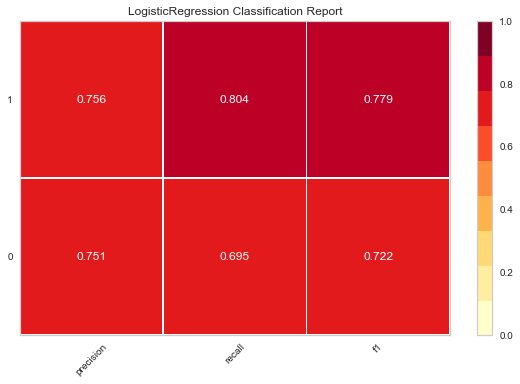

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a4aff9550>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x1a597bf2d0>,
                     encoder=None,
                     estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=100,
                                                  multi_class='auto',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     forc

In [169]:
classification_report(LogisticRegression(), X_train, y_train)

In [170]:
cross_validate(GaussianNB(), X_train, y_train, cv=TimeSeriesSplit(), scoring='f1_macro')

{'fit_time': array([0.00857496, 0.01087904, 0.01771402, 0.02529311, 0.02702188]),
 'score_time': array([0.00989795, 0.00855398, 0.007617  , 0.00907993, 0.00828004]),
 'test_score': array([0.71724231, 0.72376163, 0.71737593, 0.71983114, 0.71934181])}

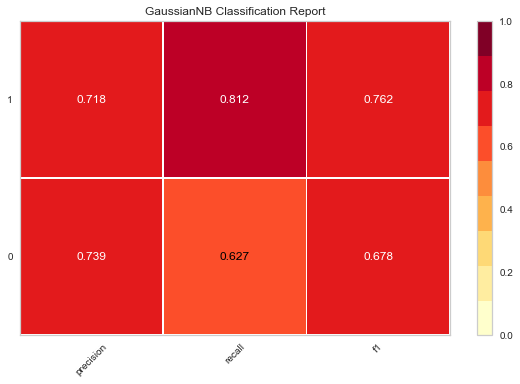

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a34cc8510>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x1a597b4110>,
                     encoder=None,
                     estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                     force_model=False, is_fitted=False, support=None)

In [171]:
classification_report(GaussianNB(), X_train, y_train, is_fitted=False)

# 6. Separating the dependent (target) and independent (features) variables

In [101]:
X = Data_Final.iloc[:, :-1].values
y = Data_Final.iloc[:,-1].values

In [102]:
X

array([[30.,  4.,  1., ...,  0.,  0.,  0.],
       [41., 13.,  1., ..., 13.,  0.,  0.],
       [49., 11.,  1., ...,  8.,  0.,  0.],
       ...,
       [30.,  4.,  0., ...,  1.,  0.,  0.],
       [35.,  9.,  0., ...,  4.,  0.,  0.],
       [38., 14.,  1., ...,  7.,  1.,  0.]])

In [103]:
y

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [104]:
# Separating into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("X- train Shape: ", X_train.shape)
print("X- test Shape: ", X_test.shape)
print("y- train Shape: ", y_train.shape)
print("y- test Shape: ", y_test.shape)

X- train Shape:  (137525, 8)
X- test Shape:  (34382, 8)
y- train Shape:  (137525,)
y- test Shape:  (34382,)


# 7. Implement standard scaling to scale the values in the dataset in the same scale

In [115]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# 8.  Apply different machine learnin algorithms

In [116]:
# Random Forest Classifier

rf_regressor = RandomForestClassifier(n_estimators=100)

# Fitting the training data on the classifier
rf_regressor.fit(X_train,y_train)

# Predicting the test data using the classifier
y_pred = rf_regressor.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

[[ 9258  6572]
 [ 3111 15441]]


<Figure size 720x432 with 0 Axes>

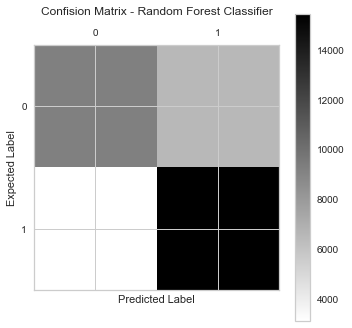

In [117]:
# Apply confusion matrix to the random forest classifier
cm = confusion_matrix(y_test,y_pred)

print(cm)

# Plot of the confusion matrix
fig = plt.figure(figsize = (10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confision Matrix - Random Forest Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [118]:
print("Total Predictions : ", len(y_pred))
print("Correct Prediction : ", sum(y_pred==y_test))
print("Incorrect Prediction : ", sum(y_pred != y_test))
print("Accuracy : ", sum(y_pred==y_test)*100 / len(y_pred),"%")

Total Predictions :  34382
Correct Prediction :  24699
Incorrect Prediction :  9683
Accuracy :  71.83700773660637 %


In [112]:
# Support Vector Classifier (SVC)
svc_regressor = SVC()

svc_regressor.fit(X_train,y_train)

y_pred = svc_regressor.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

[[ 9258  6572]
 [ 3111 15441]]


<Figure size 720x432 with 0 Axes>

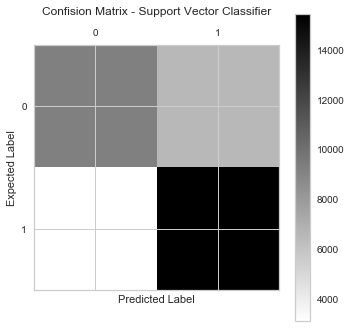

In [113]:
# Apply confusion matrix to the random forest classifier
cm = confusion_matrix(y_test,y_pred)

print(cm)

# Plot of the confusion matrix
fig = plt.figure(figsize = (10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confision Matrix - Support Vector Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [114]:
print("Total Predictions : ", len(y_pred))
print("Correct Prediction : ", sum(y_pred==y_test))
print("Incorrect Prediction : ", sum(y_pred != y_test))
print("Accuracy : ", sum(y_pred==y_test)*100 / len(y_pred),"%")

Total Predictions :  34382
Correct Prediction :  24699
Incorrect Prediction :  9683
Accuracy :  71.83700773660637 %


# Remarks: This is not yet done. I will continue working on this. Please let me know if you have any suggestions.  

In [69]:
X

array([[30.,  4.,  1., ...,  0.,  0.,  0.],
       [41., 13.,  1., ..., 13.,  0.,  0.],
       [49., 11.,  1., ...,  8.,  0.,  0.],
       ...,
       [30.,  4.,  0., ...,  1.,  0.,  0.],
       [35.,  9.,  0., ...,  4.,  0.,  0.],
       [38., 14.,  1., ...,  7.,  1.,  0.]])

In [70]:
y

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
import os
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

from yellowbrick.classifier import ClassificationReport

In [73]:
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)  
    
    expected  = y
    predicted = model.predict(X)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

In [74]:
# Try them all!

models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X, y, model)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').